In [407]:
import torch
import tiktoken


In [408]:
text = "Hello my name is Jaafar" #, because it allows us to capture syntactic and semantic from natural language."


enc = tiktoken.get_encoding("cl100k_base")
assert enc.decode(enc.encode("hello world")) == "hello world"
# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-4")

# here are all the unique characters that occur in this text
chars = sorted(list(set(text.split(" "))))
vocab_size = len(chars)

# here are all the unique characters that occur in this text
unique_words = sorted(list(set(text)))

tokens_text = enc.encode(text)

vocab_size = len(tokens_text)


jaafar_tokens = {i:token for i, token in enumerate(tokens_text)}
jaafar_tokens_reversed = {token:i for i, token in enumerate(tokens_text)}


encode = lambda s: [jaafar_tokens_reversed[c] for c in enc.encode(s)] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([enc.decode([jaafar_tokens[i]]) for i in l]) # decoder: take a list of integers, output a string


example = "Hello my name is Jaafar"
assert decode(encode(example)) == example

In [409]:
jaafar_tokens

{0: 9906, 1: 856, 2: 836, 3: 374, 4: 23720, 5: 2642, 6: 277}

In [410]:
jaafar_tokens_reversed

{9906: 0, 856: 1, 836: 2, 374: 3, 23720: 4, 2642: 5, 277: 6}

In [411]:
print(text)
print(encode(text))
print(len(text.split()))
print(len(tokens_text))


Hello my name is Jaafar
[0, 1, 2, 3, 4, 5, 6]
5
7


In [412]:
data = torch.tensor(encode(text), dtype=torch.long)
data

tensor([0, 1, 2, 3, 4, 5, 6])

In [415]:
device = "cpu"
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    
    # TODO : draw random number from 0 to [len(data)-block_size], in just one dimension. And we want N=batch_size element
    # We want to select randomly N=batch_size times a block size ! 
    ix = torch.randint(len(data) - block_size, (batch_size,))

    # TODO : We draw from this random generate our block size = Context size.
    x = torch.stack([data[i:i+block_size] for i in ix])

    # we take the next block size as a prediction
    # We just add one so that for every index, the prediction is at the same row in the same colum 
    # from X context 0 - N in a given row X  => prediction colum N+1 in y
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    
    x, y = x.to(device), y.to(device)
    return x, y

In [416]:
batch_size = 4 # How many independent sequence we will process in parallel ?
block_size = 5 # How is the maximum context length N

train_data = data
X, y = get_batch("train")

In [417]:
data = train_data
a = len(data) - block_size
b = (batch_size,)
print("data = ",data)
print("block_size = ", block_size)
print("batch_size = ", batch_size)
print(a,b)
torch.randint(a, b)

data =  tensor([0, 1, 2, 3, 4, 5, 6])
block_size =  5
batch_size =  4
2 (4,)


tensor([0, 0, 1, 1])

In [418]:
data

tensor([0, 1, 2, 3, 4, 5, 6])

In [421]:
[data[i:i+block_size] for i in [1, 1, 1, 4]]

[tensor([1, 2, 3, 4, 5]),
 tensor([1, 2, 3, 4, 5]),
 tensor([1, 2, 3, 4, 5]),
 tensor([4, 5, 6])]

In [422]:
[data[i+1:i+block_size+1] for i in [1, 1, 1, 4]]

[tensor([2, 3, 4, 5, 6]),
 tensor([2, 3, 4, 5, 6]),
 tensor([2, 3, 4, 5, 6]),
 tensor([5, 6])]

In [423]:
help(torch.randint)

Help on built-in function randint in module torch:

randint(...)
    randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with random integers generated uniformly
    between :attr:`low` (inclusive) and :attr:`high` (exclusive).
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    .. note::
        With the global dtype default (``torch.float32``), this function returns
        a tensor with dtype ``torch.int64``.
    
    Args:
        low (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
        high (int): One above the highest integer to be drawn from the distribution.
        size (tuple): a tuple defining the shape of the output tensor.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output

In [424]:
torch.randint(block_size, (batch_size,))
# ()

tensor([4, 4, 0, 1])

In [425]:
X, y = get_batch("train")

print(X) 

tensor([[1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


In [426]:
print(y)

tensor([[2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]])


In [427]:
for i in range(len(X)):
    for j in range(len(row)):
        
        print("X = ", X[i,:j+1], " ==> y = ", y[i,j])



X =  tensor([1])  ==> y =  tensor(2)
X =  tensor([1, 2])  ==> y =  tensor(3)
X =  tensor([1, 2, 3])  ==> y =  tensor(4)
X =  tensor([1, 2, 3, 4])  ==> y =  tensor(5)
X =  tensor([1, 2, 3, 4, 5])  ==> y =  tensor(6)
X =  tensor([0])  ==> y =  tensor(1)
X =  tensor([0, 1])  ==> y =  tensor(2)
X =  tensor([0, 1, 2])  ==> y =  tensor(3)
X =  tensor([0, 1, 2, 3])  ==> y =  tensor(4)
X =  tensor([0, 1, 2, 3, 4])  ==> y =  tensor(5)
X =  tensor([0])  ==> y =  tensor(1)
X =  tensor([0, 1])  ==> y =  tensor(2)
X =  tensor([0, 1, 2])  ==> y =  tensor(3)
X =  tensor([0, 1, 2, 3])  ==> y =  tensor(4)
X =  tensor([0, 1, 2, 3, 4])  ==> y =  tensor(5)
X =  tensor([0])  ==> y =  tensor(1)
X =  tensor([0, 1])  ==> y =  tensor(2)
X =  tensor([0, 1, 2])  ==> y =  tensor(3)
X =  tensor([0, 1, 2, 3])  ==> y =  tensor(4)
X =  tensor([0, 1, 2, 3, 4])  ==> y =  tensor(5)


In [428]:
vocab_size

7

In [429]:
X

tensor([[1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [430]:
X.shape # row, colums ! BATCH, CONTEXT (time)

torch.Size([4, 5])

In [431]:
import torch 
import torch.nn as nn
from torch.nn import functional as F 
torch.manual_seed(69)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token will be projected into a 13*13 dimension
        # Given a context of words, what is its meaning in our world (vocab dimension)
        # what is also happening befin the scene is that each token is encode into a one hot encoder before feedforward
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    # TODO : why this is just bigram ?
    def forward(self, x, targets=None):

        # row, colums ! BATCH, CONTEXT (time)
        logits = self.token_embedding_table(x) # Will be transformed into -> BATCH, CONTEXT, VOCAB_SIZE = Channel !
        if targets is None:
            loss = None 
        else:
            B, T, C = logits.shape
            
            # TODO: to draw
            logits = logits.view(B*T,C)
            targets = targets.view(B*T) # Targets are of shape B*T and we want to strech them over the Channel

            loss = F.cross_entropy(logits, targets) # it want a B,T,C instead of a B,C,T
        
        return logits, loss
    
    def generate(self, x, max_new_tokens):
        
        # x is (BATCH, CONTEXT=TIME) array of indices in the current context
        for _ in range(max_new_tokens):

            # get the predictions 
            logits, loss = self(x) # B,T
            # focus only on the last time step
            # TODO : Draw !
            logits = logits[:,-1,:] # comes as B,T,C becomes B,C as T is fetched
            # apply softmax to get the prob
            probs = F.softmax(logits,dim=1) # B,C

            # Sample from the distribution :
            x_next = torch.multinomial(probs, num_samples=1) # B,1
            # append sampled index to the running sequence :
            x = torch.cat((x,x_next),dim=1) # B, T+1
        return x

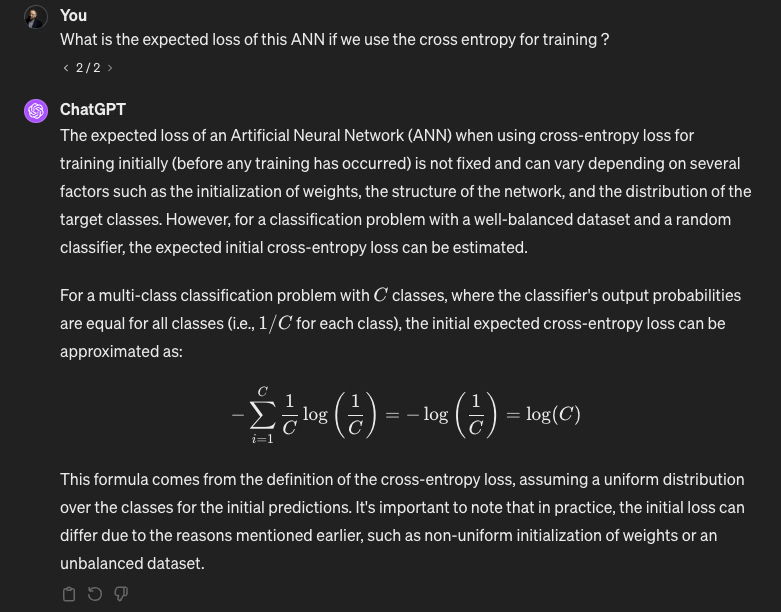

In [371]:
We are expecting a loss of -ln(1/ (vocab_size = N classes) ) = 2,56


SyntaxError: invalid syntax (3697543818.py, line 1)

In [432]:
print(X)
X.shape

tensor([[1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


torch.Size([4, 5])

In [433]:
X.view(2,10)

tensor([[1, 2, 3, 4, 5, 0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [434]:
X,y

(tensor([[1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]]),
 tensor([[2, 3, 4, 5, 6],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]]))

In [435]:
y.shape

torch.Size([4, 5])

In [464]:
m = BigramLanguageModel(vocab_size=vocab_size)

logits, _ = m(X)

logits

tensor([[[ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555],
         [ 1.5067,  1.6731, -1.4608,  0.1510,  0.1268,  0.8951, -0.0070],
         [-0.3249,  0.2579,  0.9493, -0.3155,  0.5013,  1.0141,  0.8503],
         [ 1.0721,  0.4915,  1.6628, -0.1737, -0.5899, -1.0912,  0.5287],
         [-0.7120, -0.4665, -1.6366, -1.2171,  0.1116, -0.2453,  2.3708]],

        [[ 0.0520,  0.5794, -0.4923, -0.9935, -0.6204, -0.8504,  1.2652],
         [ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555],
         [ 1.5067,  1.6731, -1.4608,  0.1510,  0.1268,  0.8951, -0.0070],
         [-0.3249,  0.2579,  0.9493, -0.3155,  0.5013,  1.0141,  0.8503],
         [ 1.0721,  0.4915,  1.6628, -0.1737, -0.5899, -1.0912,  0.5287]],

        [[ 0.0520,  0.5794, -0.4923, -0.9935, -0.6204, -0.8504,  1.2652],
         [ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555],
         [ 1.5067,  1.6731, -1.4608,  0.1510,  0.1268,  0.8951, -0.0070],
         [-0.3249,  0.2579,  0.949

In [468]:
X

tensor([[1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [469]:
vocab_size

7

In [474]:
def translate_number_to_hotencoder(number=5,vocab_size=7):
    vector = []
    if vocab_size < number:
        raise Exception("Error")
    for i in range(vocab_size):
        if (i == number-1):
            vector.append(1)
        else:
            vector.append(0)
    return torch.tensor(vector)

translate_number_to_hotencoder(5)
# X is a tensor and I would like to replace each element of the tensor by another tensor given by this function :
X.apply_(lambda x: translate_number_to_hotencoder(x))

tensor([0, 0, 0, 0, 1, 0, 0])

In [ ]:
m = BigramLanguageModel(vocab_size=vocab_size)

logits, loss = m(X,y)

logits.shape

In [476]:
X.apply_(lambda x: translate_number_to_hotencoder(x))

TypeError: only integer tensors of a single element can be converted to an index

In [467]:
X @ m.token_embedding_table.weight

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x5 and 7x7)

In [477]:
m.token_embedding_table.weight

Parameter containing:
tensor([[ 0.0520,  0.5794, -0.4923, -0.9935, -0.6204, -0.8504,  1.2652],
        [ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555],
        [ 1.5067,  1.6731, -1.4608,  0.1510,  0.1268,  0.8951, -0.0070],
        [-0.3249,  0.2579,  0.9493, -0.3155,  0.5013,  1.0141,  0.8503],
        [ 1.0721,  0.4915,  1.6628, -0.1737, -0.5899, -1.0912,  0.5287],
        [-0.7120, -0.4665, -1.6366, -1.2171,  0.1116, -0.2453,  2.3708],
        [ 0.0177,  0.0143,  0.5719,  1.1926, -1.7365, -0.6182,  1.0091]],
       requires_grad=True)

In [480]:
m(torch.tensor([[1]]) )

0100000 * [[ 0.0520,  0.5794, -0.4923, -0.9935, -0.6204, -0.8504,  1.2652],
        [ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555],
        [ 1.5067,  1.6731, -1.4608,  0.1510,  0.1268,  0.8951, -0.0070],
        [-0.3249,  0.2579,  0.9493, -0.3155,  0.5013,  1.0141,  0.8503],
        [ 1.0721,  0.4915,  1.6628, -0.1737, -0.5899, -1.0912,  0.5287],
        [-0.7120, -0.4665, -1.6366, -1.2171,  0.1116, -0.2453,  2.3708],
        [ 0.0177,  0.0143,  0.5719,  1.1926, -1.7365, -0.6182,  1.0091]] 

= 

 [ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555]

1 is translate to one hot encoder 0100000 (1*7) * 7*7 = (1*7)

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (490931034.py, line 3)

In [486]:
encode("is Jaafar")

KeyError: 285

In [491]:
decode([6])

'ar'

In [489]:
decode([1])

' my'

In [492]:
decode([5])

'af'

In [481]:
m(torch.tensor([[1]]) ) 

(tensor([[[ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555]]],
        grad_fn=<EmbeddingBackward0>),
 None)

In [505]:

enc.decode([9906])

'Hello'

In [507]:
{(k,enc.decode([v])) for k,v in jaafar_tokens.items()}

{(0, 'Hello'),
 (1, ' my'),
 (2, ' name'),
 (3, ' is'),
 (4, ' Ja'),
 (5, 'af'),
 (6, 'ar')}

In [ ]:
This means that for token (word) "1" => " my"  the vector representation using nn.Embedding non optimized is :

[[[ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555]]]

In [513]:
# optimized: 
m.token_embedding_table.weight

Parameter containing:
tensor([[-2.6660e+00,  3.2926e+00, -3.3023e+00, -3.7832e+00, -4.3218e+00,
         -4.1702e+00, -3.6557e+00],
        [-5.1472e+00, -3.7260e+00,  4.0159e+00, -2.3989e+00, -2.8273e+00,
         -4.6139e+00, -3.5465e+00],
        [-3.3777e+00, -4.2374e+00, -5.3081e+00,  4.0017e+00, -5.1654e+00,
         -3.5943e+00, -2.4848e+00],
        [-3.9527e+00, -3.5484e+00, -4.4748e+00, -1.5843e+00,  4.2135e+00,
         -4.3363e+00, -3.1492e+00],
        [-5.3418e+00, -3.6650e+00, -1.9228e+00, -3.2474e+00, -4.9977e+00,
          4.4786e+00, -3.9839e+00],
        [-5.3527e+00, -6.7892e+00, -4.2853e+00, -4.2064e+00, -2.8772e+00,
         -3.3631e+00,  2.6105e+00],
        [ 1.0873e+00,  9.9096e-01, -5.1248e-03, -1.1376e+00,  6.5849e-01,
          4.0993e-01, -5.8138e-02]], requires_grad=True)

In [515]:
{(k,enc.decode([v])) for k,v in jaafar_tokens.items()}

{(0, 'Hello'),
 (1, ' my'),
 (2, ' name'),
 (3, ' is'),
 (4, ' Ja'),
 (5, 'af'),
 (6, 'ar')}

In [519]:
# 1 token refers : " my"
m(torch.tensor([[1]]) ) # before optimization [[ 0.4279, -0.4298,  0.4985, -0.7001,  1.9153,  1.4489,  0.9555]]]
# it is like " my" now refers ==> " name"

m(torch.tensor([[4]]) ) # clearly refers now to 5 => Ja => af

m(torch.tensor([[5]]) ) # clearly refers now to 5 => af => ar

m(torch.tensor([[0]]) ) # clearly refers now to 0 => Hello => ' my'


(tensor([[[-2.6660,  3.2926, -3.3023, -3.7832, -4.3218, -4.1702, -3.6557]]],
        grad_fn=<EmbeddingBackward0>),
 None)

In [462]:
m.token_embedding_table.sparse

False

In [437]:
loss

tensor(2.4956, grad_fn=<NllLossBackward0>)

In [440]:
number_of_generated_tokens = 100
idx = torch.zeros((1,1), dtype=torch.long)
decode(m.generate(idx,number_of_generated_tokens)[0].tolist())

'Hello Ja nameararaf Ja name JaHello is name is my isafHello myHelloarHelloarafafHelloaf myHelloaf my is Ja nameararHello nameaf my Ja Ja isafHelloarafHelloar myHello is myaraf my name Ja namearHelloaf myaf my Jaararar Ja my myarar myHello Ja myHello is JaararHelloaf isafHello is nameaf is nameHello is isaf isafHello JaHello'

In [442]:
logits

tensor([[ 0.7452, -1.8389, -1.2497, -0.2485,  0.1428, -1.0509,  0.3527],
        [-0.0916,  0.0341, -0.8986,  0.1022, -0.6627, -0.1350, -0.3983],
        [-1.7892,  1.2785,  1.3351, -0.3066,  1.0382,  1.2762,  0.0419],
        [-1.2794, -1.8432,  0.8633, -1.7786, -0.8080, -0.8180, -0.7297],
        [ 0.8256,  0.8756,  0.2960,  0.6394,  1.2406,  0.7299, -0.9481],
        [-0.5300, -1.3035,  0.4438,  1.2221,  1.0395,  0.9608,  0.4214],
        [ 0.7452, -1.8389, -1.2497, -0.2485,  0.1428, -1.0509,  0.3527],
        [-0.0916,  0.0341, -0.8986,  0.1022, -0.6627, -0.1350, -0.3983],
        [-1.7892,  1.2785,  1.3351, -0.3066,  1.0382,  1.2762,  0.0419],
        [-1.2794, -1.8432,  0.8633, -1.7786, -0.8080, -0.8180, -0.7297],
        [-0.5300, -1.3035,  0.4438,  1.2221,  1.0395,  0.9608,  0.4214],
        [ 0.7452, -1.8389, -1.2497, -0.2485,  0.1428, -1.0509,  0.3527],
        [-0.0916,  0.0341, -0.8986,  0.1022, -0.6627, -0.1350, -0.3983],
        [-1.7892,  1.2785,  1.3351, -0.3066,  1.038

In [443]:
logits.shape

torch.Size([20, 7])

In [444]:
X

tensor([[1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [447]:
embedding_weights = m.token_embedding_table.weight
print(embedding_weights.shape)
embedding_weights

torch.Size([7, 7])


Parameter containing:
tensor([[-0.5300, -1.3035,  0.4438,  1.2221,  1.0395,  0.9608,  0.4214],
        [ 0.7452, -1.8389, -1.2497, -0.2485,  0.1428, -1.0509,  0.3527],
        [-0.0916,  0.0341, -0.8986,  0.1022, -0.6627, -0.1350, -0.3983],
        [-1.7892,  1.2785,  1.3351, -0.3066,  1.0382,  1.2762,  0.0419],
        [-1.2794, -1.8432,  0.8633, -1.7786, -0.8080, -0.8180, -0.7297],
        [ 0.8256,  0.8756,  0.2960,  0.6394,  1.2406,  0.7299, -0.9481],
        [ 0.6444,  0.2188, -1.2224, -0.9322, -0.3832,  1.4027,  1.9010]],
       requires_grad=True)

In [387]:
text

'Hello, my name is Jaafar and I love NLP'

### TODO : I don't get why this model is a Bigram, as it needs the whole context to predict the next word !

In [511]:
# Create optimizer 

optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

for steps in range(10000):

    # sample a batch of data 
    xb, yb = get_batch("train")

    # evaluate the loss
    logits, loss = m(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    print(loss.item())

2.647087812423706
2.55229115486145
2.550509452819824
2.6417155265808105
2.5004513263702393
2.591681957244873
2.6364312171936035
2.5416316986083984
2.539858341217041
2.5846076011657715
2.582834005355835
2.5345211029052734
2.532737970352173
2.5775058269500732
2.5291666984558105
2.6205215454101562
2.618743896484375
2.5238280296325684
2.6151797771453857
2.5668389797210693
2.518515110015869
2.5167415142059326
2.4684195518493652
2.466623306274414
2.6511454582214355
2.5562195777893066
2.6010499000549316
2.5992815494537354
2.550928831100464
2.50260066986084
2.593956470489502
2.6387221813201904
2.590390920639038
2.5421135425567627
2.586808919906616
2.5385918617248535
2.5368311405181885
2.4887051582336426
2.5333092212677
2.531548023223877
2.5760979652404785
2.574314594268799
2.526265859603882
2.4782705307006836
2.5689642429351807
2.474790096282959
2.4268622398376465
2.609842300415039
2.515719413757324
2.467806816101074
2.4660587310791016
2.464303970336914
2.4625442028045654
2.460780620574951
2.5

In [449]:
xb[0,:], yb[0,:]

(tensor([1, 2, 3, 4, 5]), tensor([2, 3, 4, 5, 6]))

In [454]:
logits = m.token_embedding_table(xb)
print(logits.shape)
logits

torch.Size([4, 5, 7])


tensor([[[-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
         [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
         [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
         [-5.0857, -5.6230, -3.0444, -5.5614, -4.6366,  3.1228, -4.5619],
         [-3.3910, -3.3436, -3.8938, -3.5678, -2.9971, -3.4819,  3.2793]],

        [[-4.7554,  3.0358, -3.8313, -3.0928, -3.2660, -3.3407, -3.8526],
         [-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
         [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
         [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
         [-5.0857, -5.6230, -3.0444, -5.5614, -4.6366,  3.1228, -4.5619]],

        [[-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
         [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
         [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
         [-5.0857, -5.6230, -3.044

In [457]:
embedding_weights = m.token_embedding_table.weight
print(embedding_weights.shape)
embedding_weights

torch.Size([7, 7])


Parameter containing:
tensor([[-4.7554,  3.0358, -3.8313, -3.0928, -3.2660, -3.3407, -3.8526],
        [-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
        [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
        [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
        [-5.0857, -5.6230, -3.0444, -5.5614, -4.6366,  3.1228, -4.5619],
        [-3.3910, -3.3436, -3.8938, -3.5678, -2.9971, -3.4819,  3.2793],
        [ 0.5830,  0.1979, -1.1059, -0.8434, -0.3466,  1.2690,  1.7199]],
       requires_grad=True)

In [456]:
B, T, C = logits.shape
logits_reshaped = logits.view(-1,C) # you can also write instead of -1, B*T
print(logits_reshaped.shape)
logits_reshaped


torch.Size([20, 7])


tensor([[-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
        [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
        [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
        [-5.0857, -5.6230, -3.0444, -5.5614, -4.6366,  3.1228, -4.5619],
        [-3.3910, -3.3436, -3.8938, -3.5678, -2.9971, -3.4819,  3.2793],
        [-4.7554,  3.0358, -3.8313, -3.0928, -3.2660, -3.3407, -3.8526],
        [-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
        [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
        [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
        [-5.0857, -5.6230, -3.0444, -5.5614, -4.6366,  3.1228, -4.5619],
        [-3.4133, -5.8736,  2.9815, -4.3592, -3.9868, -5.1233, -3.7869],
        [-3.7574, -3.6376, -4.5268,  3.7752, -4.3018, -3.7988, -4.0498],
        [-5.4636, -2.5386, -2.4847, -4.0498,  4.6453, -2.5408, -3.7175],
        [-5.0857, -5.6230, -3.0444, -5.5614, -4.636

In [458]:
print(yb.shape)
yb

torch.Size([4, 5])


tensor([[2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [2, 3, 4, 5, 6]])

In [459]:
targets = yb.view(B*T) # Targets are of shape B*T and we want to strech them over the Channel
targets

tensor([2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6])

In [ ]:
targets = targets.view(B*T) # Targets are of shape B*T and we want to strech them over the Channel

In [390]:
number_of_generated_tokens = 25
idx = torch.zeros((1,1), dtype=torch.long)
decode(m.generate(idx,number_of_generated_tokens)[0].tolist())

'Hello, my name is Jaaf name is Jaafar and I love NLPLP is Jaafar and I love N'

In [ ]:
sqd